<img src="../images/vegan-logo-resized.png" style="float: right; margin: 10px;">

# Findings and Recommended Further Steps 

Author: Gifford Tompkins

---

Project 03 | Notebook 6 of 6

## OBJECTIVE
In this notebook we will examine the scores recorded in the last notebook and create a Voting Classifier that takes all the best models and aggregates their votes.

We will compare that voting classifier to our best individual model and choose the model that scores best.

In [49]:
import pandas as pd

In [50]:
models = pd.read_csv('../datasets/model_scores.csv')

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import VotingClassifier

In [52]:
most_specific = models.sort_values(by='specificity',ascending=False).head(3)

In [53]:
most_accurat = models.sort_values(by='test_score',ascending=False).head(3)

In [54]:
vot_models = pd.concat([most_accurat,most_specific],axis=0)

In [55]:
for i in vot_models.index:
    print(vot_models['steps'][i])
    print()

[<class 'sklearn.feature_extraction.text.TfidfVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[<class 'sklearn.feature_extraction.text.CountVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[<class 'sklearn.feature_extraction.text.TfidfVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.linear_model.ridge.RidgeClassifier'>]

[<class 'sklearn.feature_extraction.text.TfidfVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.naive_bayes.MultinomialNB'>]

[<class 'sklearn.feature_extraction.text.CountVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.naive_bayes.MultinomialNB'>]

[<class 'sklearn.feature_extraction.text.CountVectorizer

In [56]:
from project_python_code import parse_performance
from model_tuning import condenser_tr
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

In [58]:
from sklearn.preprocessing import FunctionTransformer

def condenser(sparse_matrix):
    return sparse_matrix.toarray()

condenser_tr = FunctionTransformer(condenser, accept_sparse=True, validate=False)


In [59]:
cvec = CountVectorizer(max_df = 0.8,
                             max_features = 3000,
                             min_df = 5,
                             ngram_range = (1, 2),
                             stop_words = 'english')

tfid = TfidfVectorizer(max_df = 0.8,
                             max_features = 3000,
                             min_df = 3,
                             ngram_range = (1, 2),
                             stop_words = 'english')

step_cv = ('cvec', cvec)
step_tf = ('tfid', tfid)
step_cn = ('condenser', condenser_tr)

In [60]:
df = pd.read_csv('../datasets/model_data.csv')
df.head()

,title,selftext,vegan,text
0,Vegans who chastise &amp; disparage vegetarian...,Hey guys! As a long-time vegetarian who is now...,0,vegan who chastise disparage vegetarian are ...
1,I made breakfast pizza to imitate the Schwans ...,NaN,0,i made breakfast pizza to imitate the schwans ...
2,Know Your Nightshades,NaN,0,know your nightshade
3,After ten years of vegetarianism I just discov...,"This is my first time posting on this sub, I l...",0,after ten year of vegetarianism i just discove...
4,What's for Dinner? Discussion,Welcome to our weekly discussion on what you’r...,0,what ha for dinner discussion welcome to our ...


In [61]:
X = df['text']
y = df['vegan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
for i in vot_models.index:
    print(f"Model: {i}")
    print(vot_models['steps'][i])
    print(vot_models['best_params'][i])

Model: 14
[<class 'sklearn.feature_extraction.text.TfidfVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.linear_model.logistic.LogisticRegression'>]
{'logreg__C': 0.21544346900318834}
Model: 5
[<class 'sklearn.feature_extraction.text.CountVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.linear_model.logistic.LogisticRegression'>]
{'logreg__C': 0.01}
Model: 15
[<class 'sklearn.feature_extraction.text.TfidfVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.linear_model.ridge.RidgeClassifier'>]
{'ridge__alpha': 100.0}
Model: 16
[<class 'sklearn.feature_extraction.text.TfidfVectorizer'>, <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, <class 'sklearn.naive_bayes.MultinomialNB'>]
{'nb__alpha': 4.6415888336127775}
Model: 7
[<class 'sklearn.feature_extraction.text.CountVectorizer'>, <class 'sklearn.prep

In [63]:
pipe_14 = Pipeline([
    step_tf,
    step_cn,
    ('logreg',LogisticRegression(C=0.21544346900318834))
])

pipe_05 = Pipeline([
    step_cv,
    step_cn,
    ('logreg',LogisticRegression(C=0.01))
])

pipe_15 = Pipeline([
    step_tf,
    step_cn,
    ('ridge',RidgeClassifier(alpha=100.0))
])

pipe_16 = Pipeline([
    step_tf,
    step_cn,
    ('ridge',MultinomialNB(alpha=4.6415888336127775))
])

pipe_07 = Pipeline([
    step_cv,
    step_cn,
    ('ridge',MultinomialNB(alpha=4.6415888336127775))
])

pipe_01 = Pipeline([
    step_cv,
    step_cn,
    ('bagg',BaggingClassifier(n_estimators=20))
])

pipe_02 = Pipeline([
    step_cv,
    step_cn,
    ('tree',RandomForestClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=10,n_estimators=10))
])

In [64]:
vote = VotingClassifier([
    ('p01',pipe_01),
    ('p02',pipe_02),
    ('p05',pipe_05),
    ('p07',pipe_07),
    ('p04',pipe_14),
    ('p15',pipe_15),
    ('p16',pipe_16)
    ],
    n_jobs=-1,
    weights=[1,1,1,2,1,1,2]
)

In [65]:
# vote.fit(X_train,y_train)

# parse_performance(vote, X_test, y_test)

# print(vote.score(X_train,y_train))

# print(vote.score(X_test, y_test))

In [66]:
type(models['steps'][0])

str

In [67]:
models['steps'].map(lambda x: [item.split('.')[0] for item in x.split(' ')[3:-1:2]])

0     ['sklearn]
1     ['sklearn]
2     ['sklearn]
3     ['sklearn]
4     ['sklearn]
5     ['sklearn]
6     ['sklearn]
7     ['sklearn]
8     ['sklearn]
9     ['sklearn]
10    ['sklearn]
11    ['sklearn]
12    ['sklearn]
13    ['sklearn]
14    ['sklearn]
15    ['sklearn]
16    ['sklearn]
17    ['sklearn]
Name: steps, dtype: object

In [68]:
models.loc[2,'best_params']

"{'tree__max_depth': None, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 10, 'tree__n_estimators': 10}"

In [69]:
models.sort_values(by='test_score',ascending=False)

,steps,best_cross_val,best_params,train_score,test_score,sensitivity,specificity,confusion_matrix,runtime
14,[<class 'sklearn.feature_extraction.text.Tfidf...,0.795261,{'logreg__C': 0.21544346900318834},0.821974,0.787870,0.813661,0.761852,"(1382, 432, 341, 1489)",7.810136
5,[<class 'sklearn.feature_extraction.text.Count...,0.788949,{'logreg__C': 0.01},0.807520,0.787322,0.853005,0.721058,"(1308, 506, 269, 1561)",10.185824
15,[<class 'sklearn.feature_extraction.text.Tfidf...,0.789955,{'ridge__alpha': 100.0},0.804592,0.781010,0.796175,0.765711,"(1389, 425, 373, 1457)",17.614181
6,[<class 'sklearn.feature_extraction.text.Count...,0.777239,{'ridge__alpha': 100.0},0.820968,0.778540,0.863388,0.692944,"(1257, 557, 250, 1580)",19.333888
2,[<class 'sklearn.feature_extraction.text.Count...,0.786662,"{'tree__max_depth': None, 'tree__min_samples_l...",0.864056,0.777168,0.778689,0.775634,"(1407, 407, 405, 1425)",204.612410
10,[<class 'sklearn.feature_extraction.text.Tfidf...,0.781539,"{'bagg__base_estimator': None, 'bagg__n_estima...",0.975025,0.773875,0.772678,0.775083,"(1406, 408, 416, 1414)",432.460099
11,[<class 'sklearn.feature_extraction.text.Tfidf...,0.782271,"{'tree__max_depth': None, 'tree__min_samples_l...",0.850700,0.772503,0.781421,0.763506,"(1385, 429, 400, 1430)",207.255031
13,[<class 'sklearn.feature_extraction.text.Tfidf...,0.772390,"{'boost__base_estimator__max_depth': 2, 'boost...",0.807428,0.767838,0.820765,0.714443,"(1296, 518, 328, 1502)",526.747730
4,[<class 'sklearn.feature_extraction.text.Count...,0.770286,"{'boost__base_estimator__max_depth': 2, 'boost...",0.805050,0.766740,0.833333,0.699559,"(1269, 545, 305, 1525)",555.867576
12,[<class 'sklearn.feature_extraction.text.Tfidf...,0.783368,"{'tree__max_depth': None, 'tree__min_samples_l...",0.835422,0.765917,0.757377,0.774531,"(1405, 409, 444, 1386)",301.746136


In [70]:
ser_steps = models['steps']

In [71]:
ser_steps = ser_steps.str.split(' ')

In [72]:
models['classifier'] = ser_steps.map(lambda x: x[-1].split('.')[-1][:-3])

In [73]:
models['vectorizer'] = ser_steps.map(lambda x: x[1].split('.')[-1][:-3])

In [74]:
models
metrics = ['train_score','test_score','sensitivity','specificity']
models[metrics]

,train_score,test_score,sensitivity,specificity
0,0.732961,0.720088,0.940437,0.497795
1,0.974476,0.760154,0.740984,0.779493
2,0.864056,0.777168,0.778689,0.775634
3,0.844113,0.761526,0.748087,0.775083
4,0.805050,0.766740,0.833333,0.699559
5,0.807520,0.787322,0.853005,0.721058
6,0.820968,0.778540,0.863388,0.692944
7,0.773488,0.749726,0.692896,0.807056
8,0.733693,0.705543,0.831694,0.578280
9,0.737718,0.722558,0.942077,0.501103


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

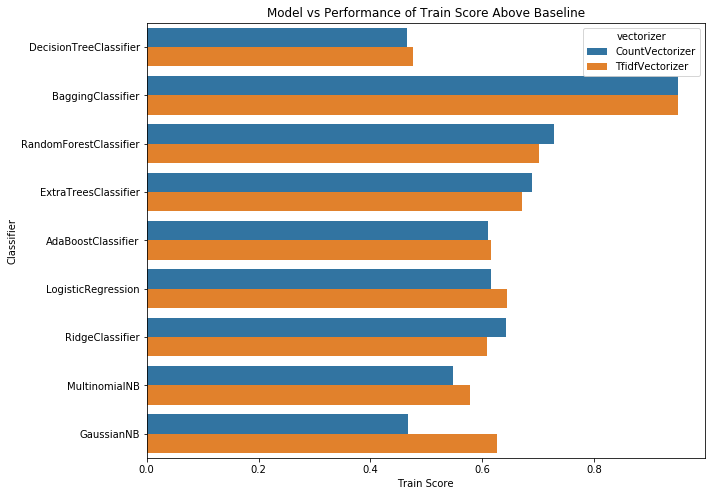

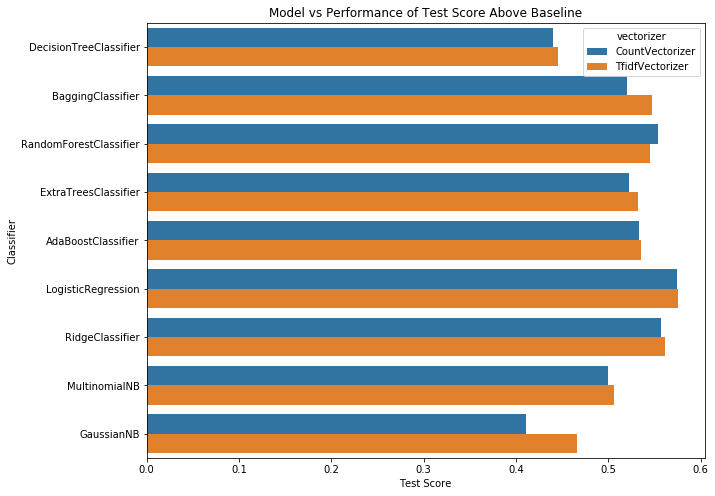

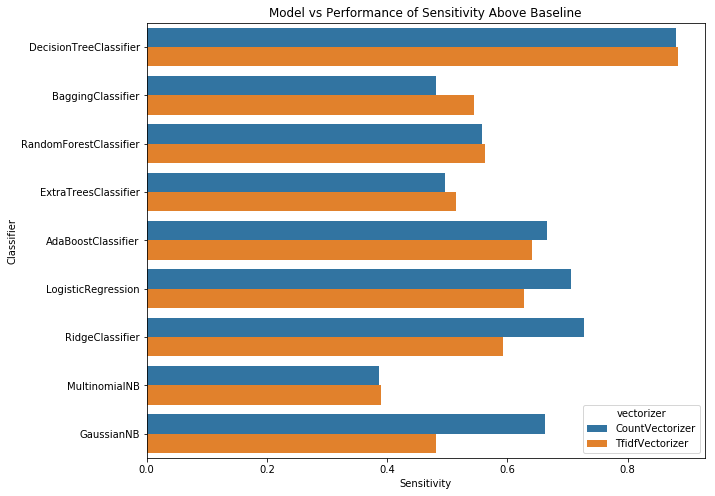

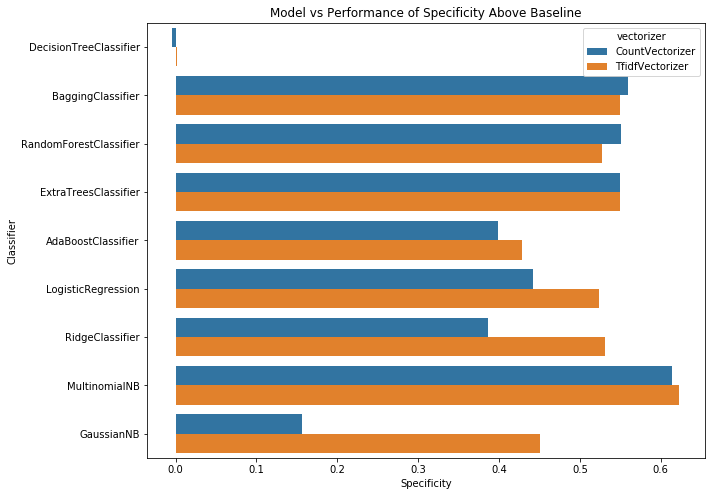

In [76]:
for metric in metrics:
    plt.figure(figsize=(10,8))
    sns.barplot(data=models,
                y='classifier',
                x=(models[metric]-0.50)/0.50,
                hue='vectorizer'
               )
    plt.title(f"Model vs Performance of {metric.title().replace('_',' ')} Above Baseline")
    plt.xlabel(f"{metric.title().replace('_',' ')}")
    plt.ylabel("Classifier")

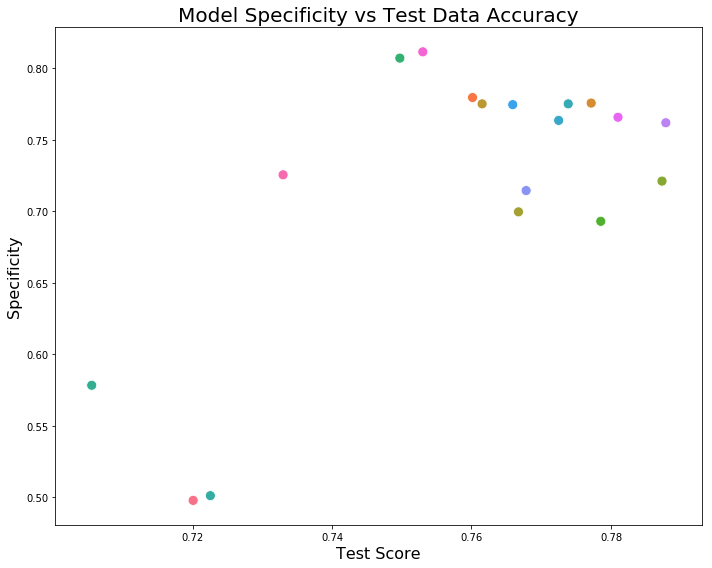

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=models,
            y='specificity',
            x='test_score',
            hue=models['classifier']+' | '+models['vectorizer'],
            s=[100]*models.shape[0]
           )
# plt.xlim((0.50,0.6))
# plt.ylim((.60,.9))
plt.title(f"Model Specificity vs Test Data Accuracy",size=20)
plt.xlabel("Test Score",size=16)
plt.ylabel("Specificity",size=16)
plt.legend().remove()
plt.tight_layout()
plt.savefig('../images/specificity_v_test.jpeg')

In [78]:
from matplotlib.patches import Circle as cir

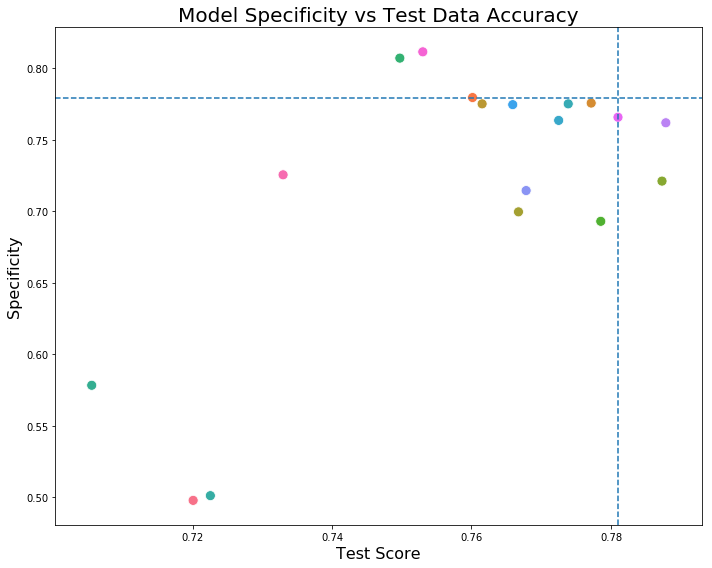

In [79]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=models,
            y='specificity',
            x='test_score',
            hue=models['classifier']+' | '+models['vectorizer'],
            s=[100]*models.shape[0]
           )
# plt.xlim((0.50,0.6))
# plt.ylim((.60,.9))
plt.title(f"Model Specificity vs Test Data Accuracy",size=20)
plt.xlabel("Test Score",size=16)
plt.ylabel("Specificity",size=16)
plt.legend().remove()

plt.axhline(0.779,linestyle='--')
plt.axvline(0.781,linestyle='--')
plt.tight_layout()



plt.savefig('../images/specificity_w_cutoff.jpeg')

##### 

In [80]:
models['compound'] = models['test_score'] * models['specificity']
models[['classifier','vectorizer','compound']].sort_values(by='compound',ascending=False)

,classifier,vectorizer,compound
16,MultinomialNB,TfidfVectorizer,0.611049
7,MultinomialNB,CountVectorizer,0.605071
2,RandomForestClassifier,CountVectorizer,0.602798
14,LogisticRegression,TfidfVectorizer,0.600241
10,BaggingClassifier,TfidfVectorizer,0.599817
15,RidgeClassifier,TfidfVectorizer,0.598028
12,ExtraTreesClassifier,TfidfVectorizer,0.593226
1,BaggingClassifier,CountVectorizer,0.592534
3,ExtraTreesClassifier,CountVectorizer,0.590245
11,RandomForestClassifier,TfidfVectorizer,0.589811


No handles with labels found to put in legend.


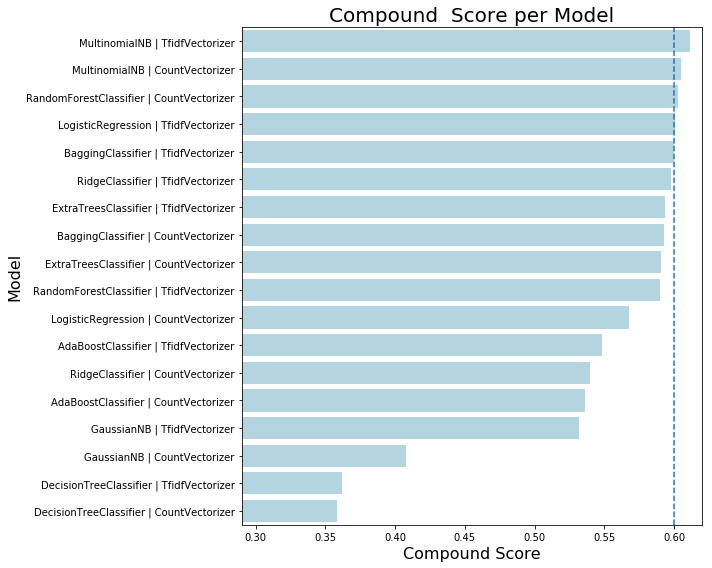

In [81]:
frame = models.sort_values(by='compound',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=frame,
            x='compound',
            y=frame['classifier'] + ' | ' + frame['vectorizer'],
#             hue=models['classifier']+' | '+models['vectorizer'],
            color='lightblue'
#             s=[100]*models.shape[0]
           )
plt.xlim((0.29,0.62))
# plt.ylim((.60,.9))
plt.title(f"Compound  Score per Model",size=20)
plt.xlabel("Compound Score",size=16)
plt.ylabel("Model",size=16)
plt.legend().remove()
#
# plt.axhline(0.779,linestyle='--')
plt.axvline(0.6,linestyle='--')
plt.tight_layout()



plt.savefig('../images/compound_w_cutoff.jpeg')

In [82]:
models[['classifier','vectorizer','specificity']].sort_values(by='specificity',ascending=False).head(3)

,classifier,vectorizer,specificity
16,MultinomialNB,TfidfVectorizer,0.811466
7,MultinomialNB,CountVectorizer,0.807056
1,BaggingClassifier,CountVectorizer,0.779493


In [83]:
models[['classifier','vectorizer','test_score']].sort_values(by='test_score',ascending=False).head(3)

,classifier,vectorizer,test_score
14,LogisticRegression,TfidfVectorizer,0.787870
5,LogisticRegression,CountVectorizer,0.787322
15,RidgeClassifier,TfidfVectorizer,0.781010


In [84]:
models.iloc[16]

steps               [<class 'sklearn.feature_extraction.text.Tfidf...
best_cross_val                                               0.754643
best_params                         {'nb__alpha': 4.6415888336127775}
train_score                                                  0.789132
test_score                                                   0.753019
sensitivity                                                  0.695082
specificity                                                  0.811466
confusion_matrix                               (1472, 342, 558, 1272)
runtime                                                       9.06182
classifier                                              MultinomialNB
vectorizer                                            TfidfVectorizer
compound                                                     0.611049
Name: 16, dtype: object

# Summary 
My best model was the Logistic Regression with the TfidfVectorizer. It scored a 0.788 on it's test score (a 56% improvement form our baseline score) and it achieved a 81% specificity score.